<a href="https://colab.research.google.com/github/renzotaco/IOIII/blob/main/RegMultiple02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

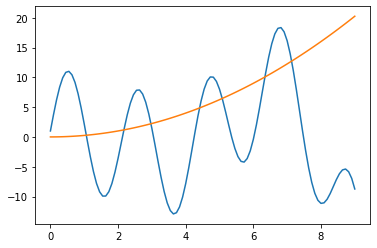

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace(0, 9, 100)
plt.plot(
    x, np.exp(x / 3) * np.cos(x) + 10 * np.sin(3 * x), 
    x, x ** 2 / 4
)
plt.show()

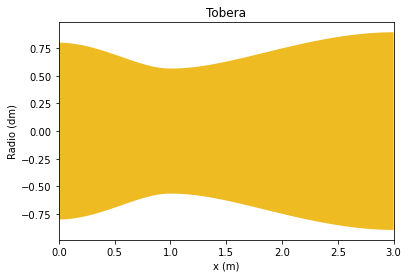

In [6]:
x = np.linspace(0, 3, 151)
 
def A(x):
    """Área transversal de la tobera.
    """
    def A1(x):
        return 2.0 * x ** 3 - 3.0 * x ** 2 + 2.0
    def A2(x):
        return (
            -3.0 * x ** 3 / 8.0 + 
            9.0 * x ** 2 / 4.0 - 
            27.0 * x / 8.0 + 
            5.0 / 2.0
        )
    return np.piecewise(
        x, 
        [(0.0 <= x) & (x < 1.0), (1.0 <= x) & (x <= 3.0)], 
        [A1, A2]
    )
 
plt.fill_between(
    x, 
    np.sqrt(A(x) / np.pi), 
    -np.sqrt(A(x) / np.pi), 
    facecolor="#eebb22"
)
plt.xlim((0, 3))
plt.title("Tobera")
plt.xlabel("x (m)")
plt.ylabel("Radio (dm)")
plt.show()

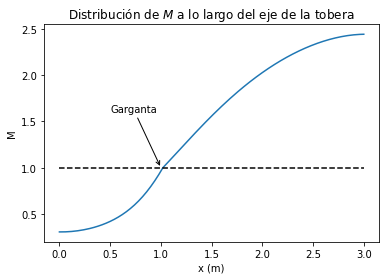

In [7]:
from scipy.optimize import brentq, newton
 
def rel(M, gamma=1.4):
    """Parte derecha de la relación entre el número de Mach $M$
    y la relación de áreas $A / A^*$.
    """
    return (2 * (1 + (gamma - 1) * M ** 2 / 2) / (gamma + 1)) ** ((gamma + 1) / 2 / (gamma - 1)) / M
 
def eq(M, A):
    """Función implícita entre el número de Mach y la relación
    de áreas.
    """
    return rel(M) - A
 
# Para cada valor de x resolvemos la ecuación en M
M = np.empty_like(x)
# El primer paso lo damos con el método de Brent
M[0] = brentq(eq, 0.001, 1, args=(A(x[0:1]),))
# Comenzamos a iterar
for i in range(1, len(x)):
    # El valor inicial para el método de Newton es la solución del
    # paso anterior
    M[i] = newton(eq, M[i - 1], args=(A(x[i - 1:i]),))
 
# Representamos la solución
plt.plot(x, M)
plt.plot(x, np.ones_like(x), 'k--')
plt.title("Distribución de $M$ a lo largo del eje de la tobera")
plt.ylabel("M")
plt.xlabel("x (m)")
plt.annotate(
    s="Garganta", 
    xy=(1.0, 1.0), 
    xytext=(0.5, 1.6), 
    arrowprops=dict(arrowstyle = "->")
)
plt.show()

In [8]:
from scipy.optimize import root
 
def f(x):
    """Sistema de dos ecuaciones con dos incógnitas.
    """
    return [
        x[0] * np.cos(x[1]) - 4,
        x[1]*x[0] - x[1] - 5
    ]
 
sol = root(f, [1, 1], jac=False) # Devuelve objecto Result
print(sol.x) # Result.x contiene la solución

[6.50409711 0.90841421]


In [9]:
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
file = 'https://raw.githubusercontent.com/fhernanb/Python-para-estadistica/master/03%20Regression/Regresi%C3%B3n%20lineal%20m%C3%BAltiple/softdrink.csv'
dt = pd.read_csv(file)

In [11]:
dt.head()  

,Obs,y,x1,x2
0,1,16.68,7,560
1,2,11.50,3,220
2,3,12.03,3,340
3,4,14.88,4,80
4,5,13.75,6,150


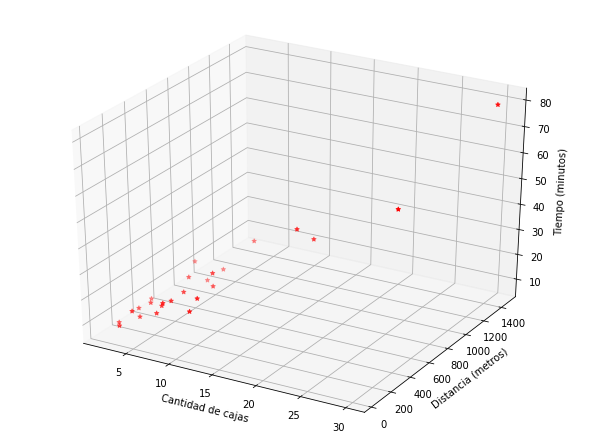

In [12]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random                             # Permiten obtener de distintos modos números aleatorios

fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x1 = dt["x1"]                             # Datos eje X
x2 = dt["x2"]                             # Datos eje Y
y = dt["y"]                               # Datos eje Z (Var. Respuesta)

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('Cantidad de cajas')        # Etiqueta del eje X
ax.set_ylabel('Distancia (metros)')       # Etiqueta del eje Y
ax.set_zlabel('Tiempo (minutos)');        # Etiqueta del eje Z (Var. Respuesta)

In [13]:
mod = smf.ols('y ~ x1 + x2', data=dt).fit()

In [14]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           4.69e-16
Time:                        21:59:24   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3412      1.097      2.135      0.0

In [15]:
mod.params

Intercept    2.341231
x1           1.615907
x2           0.014385
dtype: float64

In [16]:
mod.mse_resid

10.624167155479666

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('ventas.csv', index_col=0)
csv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(200, 200)


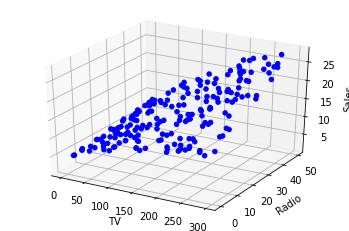

In [24]:

model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

xx, yy = np.meshgrid(csv['TV'], csv['Radio'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generar una malla
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)

exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out = fit.predict(exog=exog)

#ax.plot_surface(xx, yy, out.reshape(xx.shape), color='None')

print(xx.shape)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)



ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

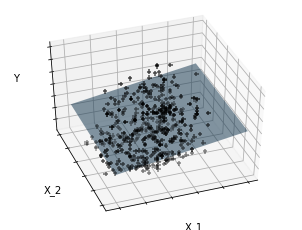

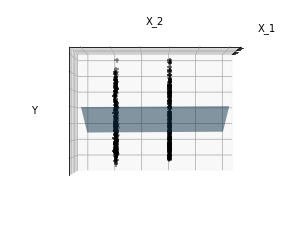

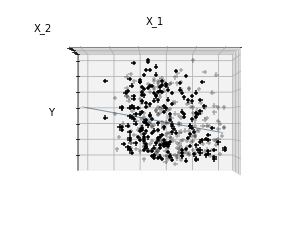

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
indices = (0, 1)

X_train = diabetes.data[:-20, indices]
X_test = diabetes.data[-20:, indices]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


# #############################################################################
# Traza la figura
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

# Generar las tres diferentes figuras desde distintas perspectivas
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()